## Using Artificial Sequential model we will be creating a binary classifier of Cat image, (CAT | NO CAT)

### 1 - Packages ##

First, let's run the cell below to import all the packages that you will need during this assignment. 
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [h5py](http://www.h5py.org) is a common package to interact with a dataset that is stored on an H5 file.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.
- [PIL](http://www.pythonware.com/products/pil/) and [scipy](https://www.scipy.org/) are used here to test your model with your own picture at the end.
- keras framework is used to construct the ANN 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

%matplotlib inline

### 2 - Overview of the Problem set ##

**Problem Statement**: We are given a dataset ("data.h5") containing:
    - a training set of m_train images labeled as cat (y=1) or non-cat (y=0)
    - a test set of m_test images labeled as cat or non-cat
    - each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB). Thus, each image is square (height = num_px) and (width = num_px).

You will build a simple image-recognition algorithm that can correctly classify pictures as cat or non-cat.

Let's get more familiar with the dataset. Load the data by running the following code.

In [2]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

We added "_orig" at the end of image datasets (train and test) because we are going to preprocess them. After preprocessing, we will end up with train_set_x and test_set_x (the labels train_set_y and test_set_y don't need any preprocessing).

Each line of your train_set_x_orig and test_set_x_orig is an array representing an image. You can visualize an example by running the following code. Feel free also to change the `index` value and re-run to see other images. 

In [3]:
train_set_x_orig.shape

(209, 64, 64, 3)

y = [0], it's a 'non-cat' picture.


<function matplotlib.pyplot.show(*args, **kw)>

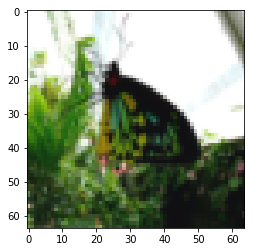

In [7]:
# Example of a picture
index = 16
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")
plt.show

Many software bugs in deep learning come from having matrix/vector dimensions that don't fit. If you can keep your matrix/vector dimensions straight you will go a long way toward eliminating many bugs. 


    - m_train (number of training examples)
    - m_test (number of test examples)
    - num_px (= height = width of a training image)
Remember that `train_set_x_orig` is a numpy-array of shape (m_train, num_px, num_px, 3). For instance, you can access `m_train` by writing `train_set_x_orig.shape[0]`.

In [15]:
### START CODE HERE ### (≈ 3 lines of code)
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]
### END CODE HERE ###

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


### 2 - Flattening of the image ! ##
For convenience, you should now reshape images of shape (num_px, num_px, 3) in a numpy-array of shape (num_px $*$ num_px $*$ 3, 1). After this, our training (and test) dataset is a numpy-array where each column represents a flattened image. There should be m_train (respectively m_test) columns.

We will reshape the training and test data sets so that images of size (num_px, num_px, 3) are flattened into single vectors of shape (num\_px $*$ num\_px $*$ 3, 1).

A trick when you want to flatten a matrix X of shape (a,b,c,d) to a matrix X_flatten of shape (b$*$c$*$d, a) is to use: 
```python
X_flatten = X.reshape(X.shape[0], -1).T      # X.T is the transpose of X
```

In [34]:
X_train_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1)
X_test_flatten =  test_set_x_orig.reshape(test_set_x_orig.shape[0], -1)

## 3 -Normalization of image !!
#### Since our image array is an array in range 0-255 we will do simple normalization first, i.e  we will divide the array by 255

In [35]:
X_train = X_train_flatten / 255
X_test = X_test_flatten / 255

In [52]:
y_train = train_set_y.T
y_test = test_set_y.T
np.unique(y_train)

array([0, 1])

In [53]:
X_train.shape[0]

209

In [54]:
print(X_train.shape)
print(y_train.shape)

(209, 12288)
(209, 1)


##### Here it's cleary visible that it is a binary classification problem with prediction either 0 or 1. 

# 4- Model Architecture !!
##### We will be creating a 2 hidden layer ANN architecture with first layer as dense as 100 and activation function as 'ReLU'. Second layer is output layer with 'logistic' as output function. 

In [61]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2

def build_model():
    model = keras.Sequential()    
    model.add(layers.Dense(100, activation = 'relu', input_shape = (X_train.shape[1],)))
    model.add(layers.Dense(1, activation = 'softmax'))
    optimizer = 'rmsprop'

    model.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
    return model

model = build_model()

In [62]:
Score = []

# fit the model
model.fit(X_train, y_train, epochs=20, verbose=1 )
score = model.evaluate(X_test, y_test)
y_hat_xgb = model.predict(X_test)
Score.append(score)

print('score :', np.mean(np.array(score)))


Epoch 1/20
209/209 [==============================] - 0s 768us/sample - loss: 10.4503 - acc: 0.3445
Epoch 2/20
209/209 [==============================] - 0s 272us/sample - loss: 10.4503 - acc: 0.3445
Epoch 3/20
209/209 [==============================] - 0s 298us/sample - loss: 10.4503 - acc: 0.3445
Epoch 4/20
209/209 [==============================] - 0s 301us/sample - loss: 10.4503 - acc: 0.3445
Epoch 5/20
209/209 [==============================] - 0s 279us/sample - loss: 10.4503 - acc: 0.3445
Epoch 6/20
209/209 [==============================] - 0s 301us/sample - loss: 10.4503 - acc: 0.3445
Epoch 7/20
209/209 [==============================] - 0s 309us/sample - loss: 10.4503 - acc: 0.3445
Epoch 8/20
209/209 [==============================] - 0s 296us/sample - loss: 10.4503 - acc: 0.3445
Epoch 9/20
209/209 [==============================] - 0s 237us/sample - loss: 10.4503 - acc: 0.3445
Epoch 10/20
209/209 [==============================] - 0s 243us/sample - loss: 10.4503 - acc: 0.3445

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(y_hat_xgb)? (<ipython-input-63-88926c71d9f7>, line 1)